# 주제 : S&P 500 기업에 대한 Total ESG risk ratings와 주가 간의 상관관계 분석(2022년 4월 기준)
##    용어 정리
###      S&P 500 기업 / Total ESG risk ratings
+ S&P 500 기업
    - 미국의 스탠더드 앤드 푸어(Standard & Poor)사가 작성해 발표하는 주가지수.
    
+ Total ESG risk ratings
    - ESG 기업 경영, 기후협약, 투자자적 관점
    - 대표적으로 두 개의 ESG 평가기관이 제시하는 지표가 많이 쓰임 (MSCI, Sustainanalytics)
    - 아직 국제적으로 하나의 통일된 기준 혹은 지표가 없음<br><br>
    - E = Environment(환경) -  기후변화, 파리협정, 플라스틱 등의 이슈<br>
      S = Social(사회) -  인권, 아동 착취, 성평등, 노동자 보호, 교육, 소비자 보호, 안전 등의 이슈<br>
      G = Governance(기업지배구조) -  공시가 중요해짐에 따라 기업의 투명성.<br>예를 들어, ESG 부서가 기업 구조적으로 기업의 결정에 실질적인 영향력을 행사할 수 있는 구조인지, 마케팅 부서에 속하며 그린워싱, ESG 워싱에 이용하는 기업인지 여부 판단.

    
    
## 주제 내용
- ESG 관련 지표가 주가와의 유의미한 상관관계가 있는가
- 상관관계가 있다면, 높은 상관관계를 가지는 기업들은 어떤 공통점이 있는가
  
## 선정 동기
- 4명 중 3명이 '주가'라는 지표에 대해 관심을 가졌고, 나머지 한 명도 2순위로는 금융을 생각하고 있어 '주가' 관련 주제를 잡았다.<br>또한,   팀원 1명은 ESG 관련 전공자였고 'ESG'라는 주제 자체가 최근 주요 시사로 떠오름에 따라 위와 같은 주제로 출발하게 되었음.

 ## 1. 데이터 수집
 ### yahoo finance의 yfinance 패키지 및 위키피디아로부터 다음과 같은 데이터를 수집함
-   yfinance : 'Total ESG risk ratings', 개별종목들의 기간별 주가, 개별종목들의 시가총액
-   위키피디아 : 'S&P 500'에 해당하는 기업 목록(기업 코드, 기업이 속한 산업 분야)

In [45]:
total_marketCap.head()   # 최종 데이터

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
30,COF,-0.912101,3.581582e-11,Financials,0.015538,0.08493,0.307128
120,PSA,-0.912057,3.603223e-11,Real Estate,0.020882,0.104286,0.350782
94,MSFT,-0.902116,1.300535e-10,Information Technology,0.81053,0.894671,0.963558
66,GS,-0.887677,6.700324e-10,Financials,0.036059,0.149737,0.435836
79,JNJ,-0.870915,3.469516e-09,Health Care,0.160865,0.368689,0.684769


- 데이터 타입<br><br>
    Symbol : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업 코드<br><br>
    Corr : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  ESG risk ratings와 주가(월말 조정된 종가) 간의 상관계수<br><br>
    P-value : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  상관계수를 구할 때 얻어지는 통계검정량<br><br>
    Sector : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업이 속한 산업 분야<br><br>
    Marketcap : float&nbsp;&nbsp&nbsp;&nbsp;&nbsp;&nbsp;#  개별 기업의 현재 시점 시가총액을 0~1 사이 scaling한 값<br><br>
    Rooted : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  시가총액의 편차가 너무 커서 루트를 씌워준 후 위와 같이 scaling한 값<br><br>
    Logged : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  루트와 같이 log를 씌워준 후 위와 같이 scaling한 값

In [12]:
#type(total_marketCap['Logged'][0])

## 2. 데이터 탐색 순서
### 'esg 관련 지표'와 '주가' 간 상관관계 분석

In [6]:
import yfinance
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime as dt
import urllib.request
import json
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import os
from pandas import json_normalize
import scipy.stats as stats
pd.set_option('display.max_rows', None)
import time
import random
import numpy as np

### 2.1 S&P 500 기업 목록 불러오기

In [3]:
# S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table
symbols_list = df['Symbol'].values.tolist()

In [4]:
symbols_list[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD']

### 2.2 ESG 지표 탐색

In [7]:
# esgScore 가져오기
url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=nvda'
connection = urllib.request.urlopen(url)
data = connection.read()
data_2 = json.loads(data)

#   esgScore 데이터 전처리
df1 = data_2['esgChart']['result'][0]['symbolSeries']
df2 = pd.DataFrame(df1)
df2['timestamp']= pd.to_datetime(df2['timestamp'], unit='s')
df2.rename(columns={'timestamp':'Date'}, inplace=True)

df2

,Date,esgScore,governanceScore,environmentScore,socialScore
0,2014-09-01,71.00,73.00,76.00,64.00
1,2014-10-01,70.00,73.00,76.00,64.00
2,2014-11-01,71.00,73.00,76.00,64.00
3,2014-12-01,71.00,73.00,76.00,64.00
4,2015-01-01,71.00,73.00,76.00,64.00
5,2015-02-01,71.00,73.00,76.00,64.00
6,2015-03-01,71.00,73.00,76.00,65.00
7,2015-04-01,71.00,73.00,76.00,65.00
8,2015-05-01,71.00,73.00,76.00,65.00
9,2015-06-01,71.00,73.00,76.00,65.00


- ESG data와 주가 간 상관관계 분석을 위해 각각 '월별 데이터'로 진행하기로 결정<br><br>
- ESG 경영에 대하여 최근 관심도가 폭증한 점과 평가기관의 지표 설정 방법 변경 시기에 따라
  2019년 12월 1일자 데이터부터 사용하기로 결정<br><br>
   (MorningStar Methodology 보고서 : https://bda4.slack.com/files/U033GQKSRA6/F038M5NMHJB/sustainabilityratingmethodology2019.pdf?origin_team=T031455DV24&origin_channel=C038EBWFFL6)<br><br>
- 비어있는 달(month)의 ESG data는 이전 달 데이터가 유지된 것이므로 fillna(method='ffill')로 전처리함

In [11]:
df_esg = df2.fillna(method='ffill')
df_esg = df_esg[(df_esg['Date'] >= '2019-12-01') & (df_esg['Date'] < '2022-03-01')]
df_esg.reset_index(drop=True, inplace=True)

pd.set_option('display.max_row', 7)
df_esg

,Date,esgScore,governanceScore,environmentScore,socialScore
0,2019-12-01,13.30,6.87,1.89,4.54
1,2020-01-01,13.30,6.87,1.89,4.54
2,2020-02-01,13.30,6.87,1.89,4.54
...,...,...,...,...,...
24,2021-12-01,12.77,6.13,2.53,4.11
25,2022-01-01,12.77,6.13,2.53,4.11
26,2022-02-01,12.77,6.13,2.53,4.11


### 2.3 개별 종목의 주가 탐색

In [9]:
# 개별종목의 주가 가져오기
price_data = yfinance.download(['005930.KS'], start = '2000-12-01' )
# df_closePrice =price_data[['Adj Close']].resample(rule='1M').last()
pd.set_option('display.max_rows', 8)
price_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-01,3080.0,3220.0,3040.0,3180.0,2421.036377,96425000
2000-12-04,3220.0,3250.0,3080.0,3100.0,2360.128906,51875000
2000-12-05,3160.0,3250.0,3120.0,3240.0,2466.716309,58400000
2000-12-06,3410.0,3430.0,3210.0,3210.0,2443.875488,95890000
...,...,...,...,...,...,...
2022-07-07,56400.0,58700.0,56300.0,58200.0,58200.000000,21322833
2022-07-08,58600.0,59300.0,58200.0,58700.0,58700.000000,15339271
2022-07-11,59300.0,59600.0,58700.0,58800.0,58800.000000,13042624
2022-07-12,58600.0,58700.0,58200.0,58400.0,58400.000000,4255963


- Close(종가)와 Adj Close(조정된 종가) 차이<br><br>
  통상적으로 주가 분석에 있어서 과거의 실적을 상세히 분석할 때 자주 사용<br><br>
  (조정 사안 : 재고분할(액면분할), 배당금 조정, 권한 개설 조정)

### 2.4 S&P 500 기업 전체에 대하여 아래 데이터를 2019년 12월자부터 불러오기
- ESG 지표<br>
- 주가(월말 종가)<br>
- 둘의 '상관계수'<br><br>

- ESG 지표가 제대로 없거나 혹은 있어도 상관계수를 도출함에 있어 검정통계량이 0.05(5%)를 초과하는 기업은 데이터에서 제외시킴

In [ ]:
# S&P 500 기업 대상 ESG data와 주가(월말 종가)를 2019년 12월자부터 불러오기

# S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table
symbols_list = df['Symbol'].values.tolist()
details_list = []
count = 1

for symbol in symbols_list:
    seed = np.random.randint(50) # 무작위 정수 뽑아줌 -> 숫자가 시작되는 시작 포인트
    np.random.seed(seed)
    a = np.random.randint(5) # 무작위 시드에서 무작위 정수를 뽑음
    time.sleep(a)
    
    try :
        # esgScore 가져오기
        url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol={symbol}'
        connection = urllib.request.urlopen(url)
        esg_data = connection.read()
        esg_data_2 = json.loads(esg_data)

        # esgScore 데이터 전처리
        df1 = esg_data_2['esgChart']['result'][0]['symbolSeries']
        df2 = pd.DataFrame(df1)
        df2['timestamp']= pd.to_datetime(df2['timestamp'], unit='s')
        df2.rename(columns={'timestamp':'Date'}, inplace=True)
        df_esg = df2.fillna(method='ffill')
        df_esg = df_esg[df_esg['Date'] >= '2019-12-01']
        df_esg.reset_index(drop=True, inplace=True)

        # 개별종목의 주가 가져오기
        price_data = yfinance.download([symbol], start = '2019-12-01' )

        # 주가 데이터 전처리 : 일별 주가를  월말 종가(월말의 종가)로 처리
        df_closePrice = price_data[['Adj Close']].resample(rule='1M').last()
        df_closePrice = df_closePrice.reset_index()
        df_closePrice.reset_index(drop=True, inplace=True)


        # esgScore와 월말주가 데이터프레임 합치기
        close_Series = pd.Series(df_closePrice['Adj Close'])
        total_info_dataframe = pd.concat([df_esg, close_Series], axis=1)
        total_info_dataframe = total_info_dataframe[:-5]  # ESG data는 2월까지이나, 주가는 3월까지 반영되므로 주가 마지막 행 삭제
        total_info_dataframe.rename(columns = {'esgScore' : 'esgRiskRating', 'Adj Close' : 'Close'}, inplace=True)


        # 상관계수, P-value 구하기
        x = total_info_dataframe.Close
        y = total_info_dataframe.esgRiskRating
        corr = stats.pearsonr(x, y)
        print(f'Company : {symbol}')
        print(f'Correaltion : {corr[0]:.4f}')
        print(f'P-value : {corr[1]:.4f}')
        print(f'count : {count}')
        count += 1

        #append
        if corr[1] <= 0.05 :
            details_list.append([symbol, corr[0], corr[1]])
        
    except :
        pass


In [17]:
total_details_df = pd.DataFrame(details_list)
total_details_df.columns = ['Symbol', 'Corr', 'P-value']

total_details_df['num'] = [i for i in range(1, 152)]
total_details_df.set_index('num', inplace=True)
total_details_df

,Symbol,Corr,P-value
num,,,
1,MMM,0.656121,0.000202
2,AOS,-0.610639,0.000717
3,ABT,-0.711133,0.000032
...,...,...,...
149,WHR,-0.500443,0.007849
150,WMB,-0.469672,0.013444
151,ZTS,-0.732385,0.000014


In [18]:
total_details_df.to_csv('./total_details_df(AdjClose)_202204')

### 2.5 전체 기업의 상관계수를 bar plot으로 나열해보는 작업

In [57]:
total_bar_df = total_details_df.sort_values(by='Corr', ascending=False).reset_index(drop=True)
pd.set_option('display.max_rows', 10)
total_bar_df

,Symbol,Corr,P-value
0,JPM,0.889550,5.487510e-10
1,PNC,0.861970,7.621745e-09
2,UNP,0.852242,1.689704e-08
3,CVS,0.849965,2.019253e-08
4,KHC,0.840932,3.982800e-08
...,...,...,...
146,JNJ,-0.870916,3.469488e-09
147,GS,-0.887677,6.700321e-10
148,MSFT,-0.902116,1.300534e-10
149,COF,-0.912019,3.622011e-11


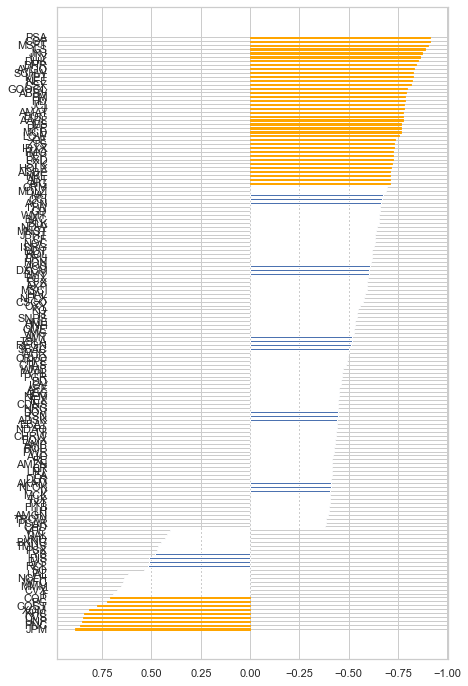

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(7,12)).gca().invert_xaxis()
bars = plt.barh(total_bar_df['Symbol'], total_bar_df['Corr'], height=0.3, left=0)

for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')

In [26]:
total_bar_df[abs(total_bar_df['Corr']) >= 0.7].count()

Symbol     47
Corr       47
P-value    47
dtype: int64

In [24]:
total_bar_df[abs(total_bar_df['Corr']) >= 0.5].count()

Symbol     100
Corr       100
P-value    100
dtype: int64

In [25]:
total_bar_df[abs(total_bar_df['Corr']) < 0.5].count()

Symbol     51
Corr       51
P-value    51
dtype: int64

### <1차 결론> : S&P 500 기업에서 유의미한 상관계수 측정 가능한 151개 중<br><br>기업  47개 기업만이 매우 강한 상관관계를 가진다는 것을 발견함
> 원래 2022년 4월 조사하여 2022년 2월까지의 데이터로는 매우 강한 상관관계를 가지는(|상관계수| > =0.7) 기업 개수가 49개였으나, 해당 기간에 대해 7월 중 재입력을 하니 개수가 변동되었으며 이는 S&P50 기업 목록에서 편입 및 퇴출되는 과정에서 비롯된 것으로 판단됨

## 3. 데이터 추가 분석
### '강한 상관관계를 가지는 기업들은 서로 공통점이 있는가?'
>**'산업 분류'**가 같을지 의문제기

### 3.1 위 'total_details_df' 데이터프레임에 column으로 개별 기업이 속한 **'산업 분야'**를 표에 이어 붙인 후 **scatterplot에 일단 뿌려보기**

In [30]:
# 기업이 속한 산업분야 목록 불러오기
pd.set_option('display.max_rows', 8)

payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df_wiki = first_table
symbols_list2 = df_wiki['Symbol'].values.tolist()
sectors_list2 = df_wiki['GICS Sector'].values.tolist()

sector_dataframe = pd.DataFrame(symbols_list, columns=['Symbol'])
sector_dataframe['Sector'] = sectors_list2

sector_dataframe

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
...,...,...
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials
502,ZTS,Health Care


In [33]:
total_details_addSector = pd.merge(total_details_df, sector_dataframe, how='inner', on=None)

total_details_addSector['num'] = [i for i in range(1, 152)]
total_details_addSector.set_index('num', inplace=True)

total_details_addSector

,Symbol,Corr,P-value,Sector
num,,,,
1,MMM,0.656121,0.000202,Industrials
2,AOS,-0.610639,0.000717,Industrials
3,ABT,-0.711133,0.000032,Health Care
4,ABBV,-0.788800,0.000001,Health Care
...,...,...,...,...
148,WFC,0.644402,0.000286,Financials
149,WHR,-0.500443,0.007849,Consumer Discretionary
150,WMB,-0.469672,0.013444,Energy
151,ZTS,-0.732385,0.000014,Health Care


<AxesSubplot:xlabel='Corr', ylabel='P-value'>

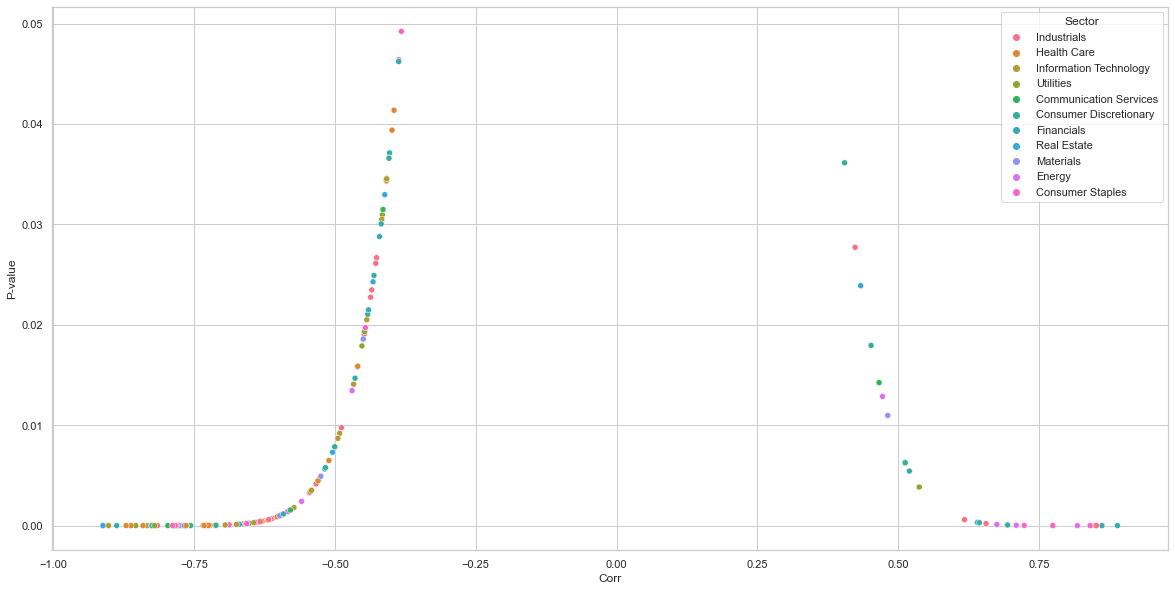

In [34]:
plt.figure(figsize=(20,10))

plt = sns.scatterplot(data=total_details_addSector, x="Corr", y="P-value", hue='Sector')

plt

In [37]:
pd.set_option('display.max_rows',13)

total_sector = total_details_addSector
total_sector['Sector'].value_counts()

Industrials               26
Health Care               23
Financials                22
Information Technology    21
Consumer Discretionary    15
Consumer Staples          11
Energy                     9
Real Estate                7
Utilities                  6
Materials                  6
Communication Services     5
Name: Sector, dtype: int64

In [42]:
pd.set_option('display.max_rows',8)

total_sector[total_sector['Corr'] <= -0.7].sort_values('Sector')
# 강한 음의 상관관계를 가지는 기업

,Symbol,Corr,P-value,Sector
num,,,,
9,GOOGL,-0.796783,6.594042e-07,Communication Services
71,HD,-0.786089,1.175947e-06,Consumer Discretionary
86,LOW,-0.756287,5.035320e-06,Consumer Discretionary
88,MCD,-0.763929,3.538047e-06,Consumer Discretionary
...,...,...,...,...
93,MSFT,-0.902116,1.300534e-10,Information Technology
119,PSA,-0.912057,3.603216e-11,Real Estate
51,DUK,-0.853757,1.498229e-08,Utilities
101,NEE,-0.820280,1.626741e-07,Utilities


In [39]:
len(total_sector[(total_sector['Corr'] > -0.7) & (total_sector['Corr'] <= -0.5)].sort_values('Sector'))
# 어느 정도 음의 상관관계를 가지는 기업

43

In [40]:
len(total_sector[(total_sector['Corr'] >= 0.5) & (total_sector['Corr'] < 0.7)].sort_values('Sector'))
# 어느 정도 양의 상관관계를 가지는 기업

10

In [41]:
len(total_sector[total_sector['Corr'] >= 0.7].sort_values('Sector'))
# 강한 양의 상관관계를 가지는 기업

9

In [72]:
len(total_sector[(total_sector['Corr'] > -0.5) & (total_sector['Corr'] < 0.5)].sort_values('Sector'))
# 유의미한 상관관계가 없는 기업

51

### 3.2 '산업 분류'라는 지표 하나만으로는 유의미한 분석이 안 되겠다. 그럼 '시가총액'이 큰 기업들이 상관관계가 높을까?

- 시가총액 불러오기<br><br>
- 기업별 시가총액 차이 bar plot으로 확인해보기<br><br>
- 범위가 [-1, 1]인 Corr과 같이 차트에 놓고 보기에, 시가총액 차이가 너무 커서 구분이 힘들다면 **scaling** 해주기(MinMaxScaler())<br><br>
- 앞선 'total_sector' 데이터프레임에 시가총액(marketCap)을 이어붙이기


In [ ]:
# 선발되었던 기업들의 시가총액을 total_sector에 합치기
import pandas_datareader as web
from pandas_datareader import data

tickers = total_sector['Symbol']
marketData_list = []

for ticker in tickers:
    print(ticker)
    try: 
        marketData_list.append(web.get_quote_yahoo(ticker)['marketCap'])
    except:
        print('Error with: ', ticker)
                
# 시가총액에 대해 루트를 씌워서 비교 후 log를 씌워서 비교해보려 함
df3 = pd.concat(marketData_list, axis=0)
df4 = pd.DataFrame(df3).reset_index()
df4['rooted'] = np.sqrt(df4['marketCap'])
df4['logged'] = np.log(df4['marketCap'])

marketData_df = df4

In [44]:
marketData_df

,index,marketCap,rooted,logged
0,MMM,73414295552,270950.725321,25.019385
1,AOS,8844037120,94042.740921,22.903009
2,ABT,190659854336,436646.143159,25.973757
3,ABBV,270774255616,520359.736736,26.324551
...,...,...,...,...
147,WFC,150818029568,388352.970335,25.739340
148,WHR,9001376768,94875.585732,22.920643
149,WMB,38683996160,196682.475478,24.378692
150,ZTS,83320152064,288652.303064,25.145956


### 3.3 기업 간 시가총액 비교

<BarContainer object of 151 artists>

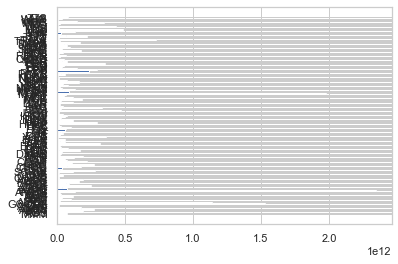

In [45]:
import matplotlib.pyplot as plt

plt.barh(marketData_df['index'],marketData_df['marketCap'])


### 3.4 한 표에 x범위가 [-1, 1]인 Corr과 같이 그래프를 놓기 위하여 Scailing하여 자료 정리

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['marketCap', 'rooted','logged'])
    ], remainder='passthrough')
ct_dataframe = pd.DataFrame(ct.fit_transform(marketData_df), columns=['Marketcap','Rooted','Logged','Symbol'])

<BarContainer object of 151 artists>

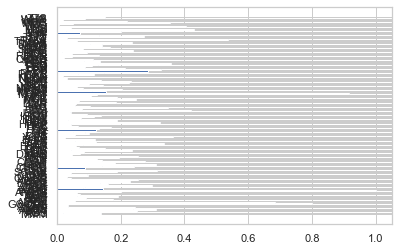

In [47]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Rooted'])

<BarContainer object of 151 artists>

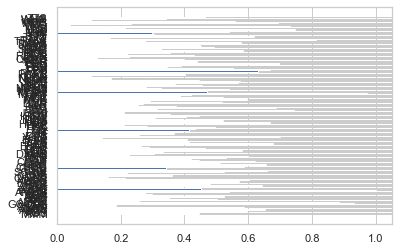

In [48]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Logged'])

In [49]:
total_marketCap = pd.merge(total_sector, ct_dataframe, how='inner', on=None)

In [50]:
total_marketCap = total_marketCap.sort_values('Corr', ascending=True)
total_marketCap

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
118,PSA,-0.912057,3.603216e-11,Real Estate,0.02164,0.114278,0.398851
30,COF,-0.912019,3.622011e-11,Financials,0.016037,0.09393,0.355393
92,MSFT,-0.902116,1.300534e-10,Information Technology,0.843399,0.914762,0.972744
66,GS,-0.887677,6.700321e-10,Financials,0.041065,0.170515,0.495155
...,...,...,...,...,...,...,...
43,CVS,0.849965,2.019253e-08,Health Care,0.051108,0.194493,0.5288
139,UNP,0.852242,1.689704e-08,Industrials,0.05436,0.201761,0.538337
114,PNC,0.861970,7.621745e-09,Financials,0.026353,0.129584,0.428051
81,JPM,0.889550,5.487510e-10,Financials,0.139684,0.347093,0.686242


### 3.5 Corr이 1 또는 -1에 가까워질 때 시가총액이 커지는 모습이 나오는가?

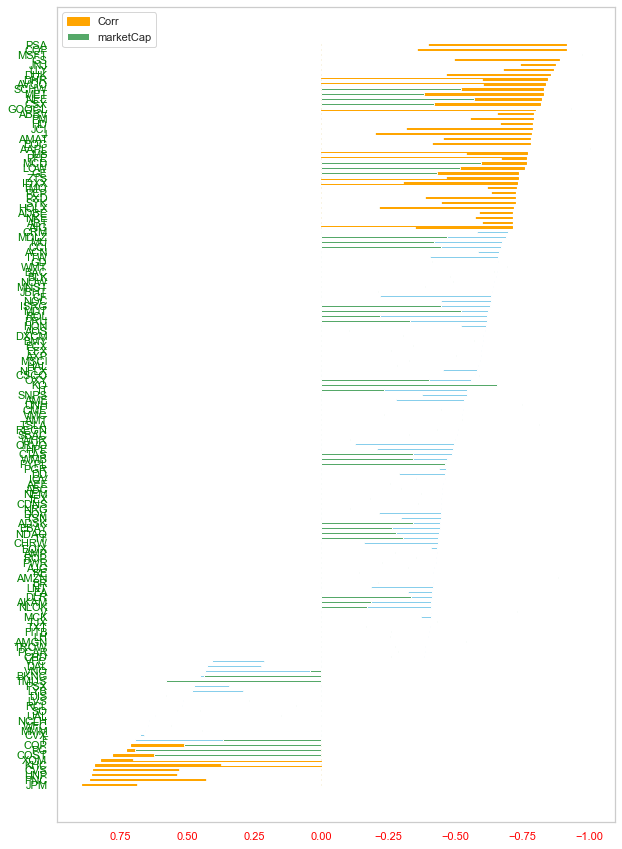

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15)).gca().invert_xaxis()

# [3/3 단계] 차트 좌우 맞추기 위한 작업
total_bar_df2= total_marketCap.sort_values(by='Corr', ascending=False).reset_index(drop=True)
(total_bar_df2[total_bar_df2['Corr'] < 0]['Marketcap']) *= -1

tempbar = total_bar_df2.copy()

# [1/3 단계] 먼저 'Corr'에 대한 bar chart 표현
bars = plt.barh(tempbar['Symbol'], total_bar_df2['Corr'], height=0.3, left=0, color='skyblue', label='Corr')
for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')

# [2/3 단계] 두번째로 'marketCap'에 대한 bar chart 표현

for item,row in total_bar_df2.iterrows() :
    if row['Corr'] < 0 : 
        tempbar.loc[tempbar['Symbol'] == row['Symbol'],'Logged'] *= -1
    
bars = plt.barh(tempbar['Symbol'], tempbar['Logged'], height=0.25, left=0, color='g', label='marketCap')

plt.tick_params(axis='x', labelcolor = 'red')
plt.tick_params(axis='y', labelcolor = 'green')

plt.grid(False)
plt.legend()

### 3.6 각 산업별로 나눈 후, '상관관계의 깊음 정도'가 '시가총액의 크기'에 비례하는지를 보고자 함.

In [63]:
sectors = total_marketCap['Sector'].value_counts().index
sectors

Index(['Industrials', 'Health Care', 'Financials', 'Information Technology',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Real Estate',
       'Utilities', 'Materials', 'Communication Services'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
2
3
4
5
6
7
8
9
10
11


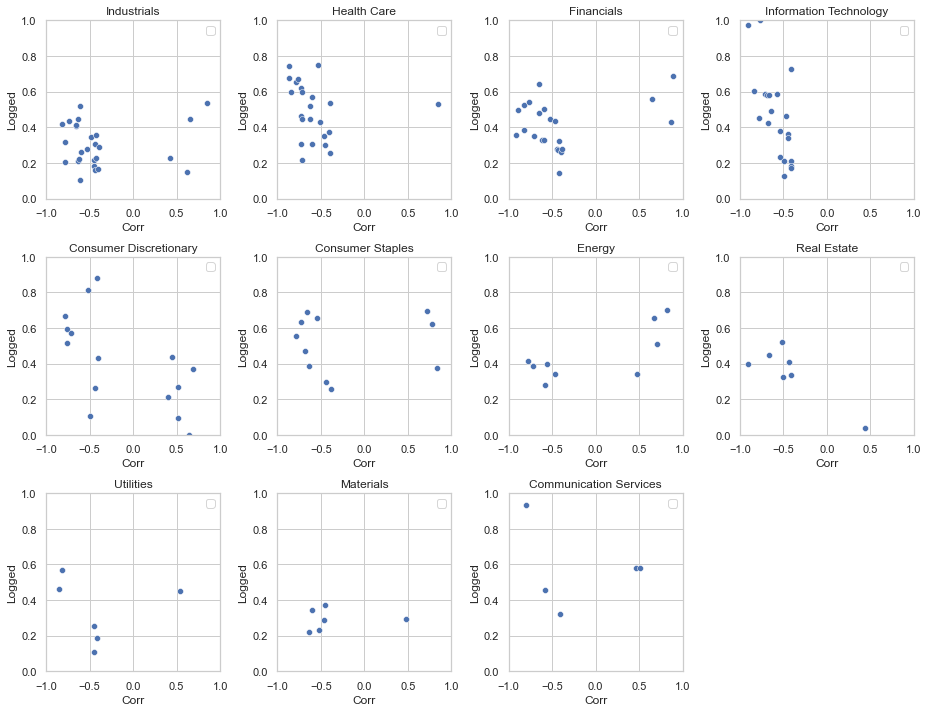

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))
count=0

for i, sector in enumerate(sectors):
    plt.subplot(3, 4, i+1)
    plt.title(sector)
    plt.xlim(-1,1)
    plt.ylim(0,1)
    plt.xlabel('Corr')
    plt.ylabel('Logged')
    plt.legend(loc='best')
    sns.scatterplot(total_marketCap[total_marketCap['Sector'] == sector]['Corr'], total_marketCap[total_marketCap['Sector'] == sector]['Logged'])
    #sns.regplot(x='Corr', y='log', data=df10[df10['sector']])
    count += 1
    print(count)

fig.tight_layout()

### <2차 결론> S&P 500 기업 중 유의미한 상관계수를 가지는 기업은 151개가 있었고,<br><br> 그 중 유의미한 상관관계를 가지는 기업은 100개였으며, 강한 상관관계를 가지는 기업은 47개가 있다.<br><br>그리고 그 47개 기업 중에서 'IT'와 'HealthCare' 에 속하는 기업들은 '상관관계의 깊음 정도'와<br><br>'시가총액의 규모'가 비례관계에 있음을 확인하였음.
>즉, 해당 섹터 내 기업들은 규모가 클수록 'ESG 지표와 주가 간 상관관계'가 매우 깊어지는 형태를 볼 수 있음
>> 음의 상관관계 : COF, PSA, MSFT, GS, JNJ, LLY, FB, DUK, DHR, AVGO, SCHW, MET, NEEM, CSXM, GOOGL<br><br>
>> 양의 상관관계 : JPM, PNC, UNP, CVS, KHC, XOM 등

In [66]:
# 기본적으로 주가와 ESG 지표가 매우 강한 상관관계를 가지는 기업 목록
pd.set_option('display.max_rows', None)
total_marketCap[abs(total_marketCap['Corr']) >= 0.7]

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
118,PSA,-0.912057,3.603216e-11,Real Estate,0.02164,0.114278,0.398851
30,COF,-0.912019,3.622011e-11,Financials,0.016037,0.09393,0.355393
92,MSFT,-0.902116,1.300534e-10,Information Technology,0.843399,0.914762,0.972744
66,GS,-0.887677,6.700321e-10,Financials,0.041065,0.170515,0.495155
79,JNJ,-0.870916,3.469488e-09,Health Care,0.198584,0.421794,0.742007
54,LLY,-0.862097,7.539988e-09,Health Care,0.132704,0.337277,0.678138
50,DUK,-0.853757,1.498229e-08,Utilities,0.033555,0.150687,0.464396
44,DHR,-0.840892,3.994306e-08,Health Care,0.080465,0.253793,0.599412
26,AVGO,-0.833272,6.862102e-08,Information Technology,0.08136,0.255418,0.601144
32,SCHW,-0.825864,1.132334e-07,Financials,0.049041,0.189757,0.522427


## 기타) 위 IT 및 HealthCare 그룹에 속한 기업들은 각 산업별로 주가가 같은 방향으로 움직일까?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:>

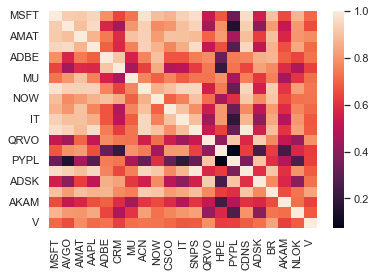

In [67]:
new_symbols_list = total_marketCap[total_marketCap['Sector'] == 'Information Technology']['Symbol'].tolist()
prices_each = []
symbol_list_last=[]
count=0

for symbol in new_symbols_list:
    price_data = yfinance.download([symbol], start = '2019-12-01' )
    price_list = price_data['Adj Close'].values.tolist()
    
    prices_each.append(price_list)
    symbol_list_last.append(symbol)
    
price_table = pd.DataFrame(prices_each)
price_table = price_table.T
price_table.columns = symbol_list_last

sns.heatmap(price_table.corr())
